In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [2]:
# Load the datasetr
data = pd.read_csv(r"C:\Users\V V Samhitha\OneDrive\Desktop\Codsoft\creditcard.csv")


In [3]:
# Data preprocessing and normalization
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [4]:
# Handling class imbalance
X = data.drop(['Class'], axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [6]:
# Model training - Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Model evaluation - Logistic Regression
y_pred_lr = lr_model.predict(X_test)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)


In [12]:
# Confusion matrix - Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

[[55855   895]
 [ 1890 55086]]


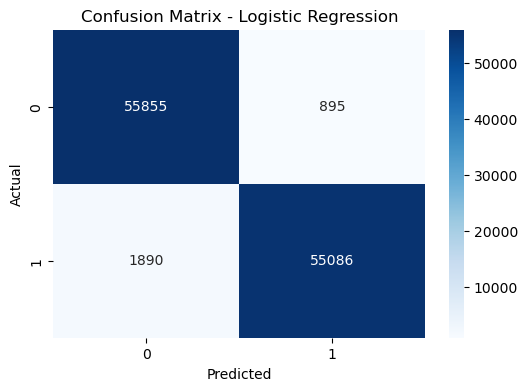

In [9]:
# Visualizations
# Confusion matrix heatmap - Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Print evaluation metrics
print("Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print("ROC-AUC:", roc_auc_lr)

Logistic Regression:
Precision: 0.9840124327896965
Recall: 0.9668281381634373
F1-Score: 0.9753446001575821
ROC-AUC: 0.9755286065266526
